# PATTERN MINING

In [1156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.frequent_patterns import fpgrowth

In [1157]:
train = pd.read_csv('pp_train.csv')
test = pd.read_csv('pp_test.csv')
df = pd.concat([train, test], axis=0, ignore_index=True) #abbiamo unito train e test

In [1158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21556 entries, 0 to 21555
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                21556 non-null  object 
 1   rating                       21556 non-null  int64  
 2   startYear                    21556 non-null  int64  
 3   endYear                      20516 non-null  float64
 4   runtimeMinutes               15393 non-null  float64
 5   awardWins                    21556 non-null  float64
 6   numVotes                     21556 non-null  int64  
 7   totalImages                  21556 non-null  int64  
 8   totalVideos                  21556 non-null  int64  
 9   totalCredits                 21556 non-null  int64  
 10  criticReviewsTotal           21556 non-null  int64  
 11  titleType                    21556 non-null  object 
 12  awardNominationsExcludeWins  21556 non-null  int64  
 13  canHaveEpisodes 

In [1159]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'countryOfOrigin', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryO

## Gestione variabili 

### Osservare la distribuzione delle numeriche per binning

In [1160]:
df['totalNominations'].value_counts().sort_index()

totalNominations
0.0      17961
1.0       1341
2.0        642
3.0        336
4.0        262
         ...  
170.0        1
172.0        2
306.0        1
339.0        1
409.0        1
Name: count, Length: 87, dtype: int64

count    21556.000000
mean         0.975135
std          6.750601
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        409.000000
Name: totalNominations, dtype: float64


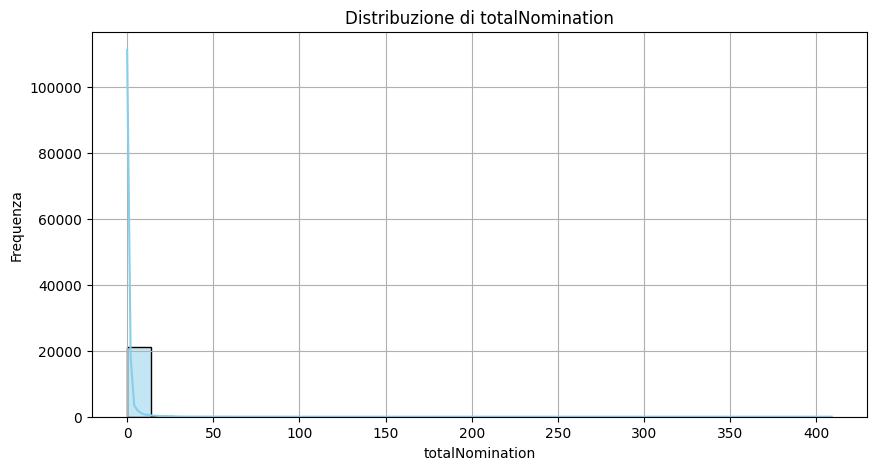

In [1161]:
# Statistiche descrittive
print(df['totalNominations'].describe())

# Istogramma + KDE (curva di densità)
plt.figure(figsize=(10, 5))
sns.histplot(df['totalNominations'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribuzione di totalNomination')
plt.xlabel('totalNomination')
plt.ylabel('Frequenza')
plt.grid(True)
# plt.yscale("log")
plt.show()

In [1162]:
df['startYear'].value_counts().sort_index()
# df['fill_runtimeMinutes_Bruno'].value_counts().sort_index()
# df['totalMedia'].value_counts().sort_index()
# df['numVotes'].value_counts().sort_index()
# df['totalCredits'].value_counts().sort_index()
# df['criticReviewsTotal'].value_counts().sort_index()
# df['numRegions'].value_counts().sort_index()
# df['userReviewsTotal'].value_counts().sort_index()
# df['rating'].value_counts().sort_index()

startYear
1878      1
1891      1
1893      1
1894      7
1895      7
       ... 
2020    522
2021    520
2022    476
2023    418
2024    167
Name: count, Length: 133, dtype: int64

### Trasformazione binaria con valori semanticamente significativi

In [1163]:
df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
canhaveeps_dict = {0: "cant_have_episodes", 1: "can_have_episodes"}
df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)
df["canHaveEpisodes"]

0        cant_have_episodes
1        cant_have_episodes
2         can_have_episodes
3         can_have_episodes
4        cant_have_episodes
                ...        
21551    cant_have_episodes
21552    cant_have_episodes
21553    cant_have_episodes
21554     can_have_episodes
21555     can_have_episodes
Name: canHaveEpisodes, Length: 21556, dtype: object

In [1164]:
df["isAdult"] = df["isAdult"].astype(int)
canhaveeps_dict = {0: "is_not_adult", 1: "is_adult"}
df["isAdult"] = df["isAdult"].map(canhaveeps_dict)
df["isAdult"]

0        is_not_adult
1        is_not_adult
2        is_not_adult
3        is_not_adult
4        is_not_adult
             ...     
21551    is_not_adult
21552    is_not_adult
21553    is_not_adult
21554    is_not_adult
21555    is_not_adult
Name: isAdult, Length: 21556, dtype: object

### Handling of numerical attributes
Delle seguenti variabili: 'rating', 'startYear', 'numVotes', 'totalCredits', 'criticReviewsTotal', 'numRegions', 'userReviewsTotal',
    'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS',
       'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA',
       'countryOfOrigin_UNK'
       'fill_runtimeMinutes_Bruno', 'totalNominations',
       'totalMedia'

In [1165]:
df_copy = df.copy()

##### TotalNominations

In [1166]:
df_copy["log_totalNominations"] = np.log1p(df["totalNominations"])

In [1167]:
#TOTALNOMINATIONS LOG-TRANSFORMED
log_bins = [-0.01, 0, np.log(5), np.log(20), df_copy['log_totalNominations'].max()]
labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

df_copy['log_nom_bin_cut'] = pd.cut(df_copy['log_totalNominations'], 
                                bins=log_bins, 
                                labels=labels)

print(df_copy.groupby('log_nom_bin_cut')['totalNominations'].describe())

                   count       mean        std   min   25%   50%   75%    max
log_nom_bin_cut                                                              
ZeroNom          17961.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0
LowNom            2581.0   1.813638   1.010672   1.0   1.0   1.0   2.0    4.0
MediumNom          838.0   8.984487   3.835133   5.0   6.0   8.0  11.0   19.0
VeryHighNom        176.0  50.056818  51.861983  20.0  24.0  31.0  51.5  409.0


In [1168]:
#TOTALNOMINATIONS NON LOG-TRANSFORMED   
bins = [-1, 0, 2, 10, df_copy['totalNominations'].max()]
labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

df_copy['totalNominations_bin'] = pd.cut(df_copy['totalNominations'], 
                                bins=bins, 
                                labels=labels)

print(df_copy.groupby('totalNominations_bin')['totalNominations'].describe())

                        count       mean        std   min   25%   50%   75%  \
totalNominations_bin                                                          
ZeroNom               17961.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
LowNom                 1983.0   1.323752   0.468025   1.0   1.0   1.0   2.0   
MediumNom              1191.0   5.133501   2.072179   3.0   3.0   4.0   6.0   
VeryHighNom             421.0  29.171021  37.925920  11.0  13.0  17.0  28.0   

                        max  
totalNominations_bin         
ZeroNom                 0.0  
LowNom                  2.0  
MediumNom              10.0  
VeryHighNom           409.0  


##### TotalMedia

In [1169]:
df_copy["log_totalMedia"] = np.log1p(df["totalMedia"])

In [1170]:
#TOTALMEDIA NON LOG-TRANSFORMED
bins = [-1, 0, 1, 8, 50, df_copy['totalMedia'].max()]
labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
df_copy['media_bin'] = pd.cut(df_copy['totalMedia'], bins=bins, labels=labels)

print(df_copy.groupby('media_bin')['totalMedia'].describe())

                count        mean         std   min   25%   50%    75%     max
media_bin                                                                     
ZeroMedia      4296.0    0.000000    0.000000   0.0   0.0   0.0    0.0     0.0
LowMedia       6296.0    1.000000    0.000000   1.0   1.0   1.0    1.0     1.0
MediumMedia    6697.0    3.859041    1.910362   2.0   2.0   3.0    5.0     8.0
HighMedia      3353.0   19.623024   10.535930   9.0  11.0  16.0   25.0    50.0
VeryHighMedia   914.0  166.155361  306.398912  51.0  67.0  90.0  145.0  3516.0


In [1171]:
#TOTALMEDIA LOG-TRANSFORMED
log_bins = [-1, 0, 1.61, 3.1, 4.0, np.log(df_copy['totalMedia'].max())]
labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
df_copy['log_media_bin'] = pd.cut(df_copy['totalMedia'], bins=log_bins, labels=labels)

print(df_copy.groupby('log_media_bin')['totalMedia'].describe())

                count      mean       std  min  25%  50%  75%  max
log_media_bin                                                     
ZeroMedia      4296.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
LowMedia       6296.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
MediumMedia    3562.0  2.339978  0.473768  2.0  2.0  2.0  3.0  3.0
HighMedia       946.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0
VeryHighMedia  2189.0  6.269986  1.105793  5.0  5.0  6.0  7.0  8.0


##### fill_runtimeMinutes_Bruno

In [1172]:
df_copy["log_fill_runtimeMinutes_Bruno"] = np.log1p(df["fill_runtimeMinutes_Bruno"])

In [1173]:
#FILL_RUNTIMEMINS_BRUNO NON LOG-TRANSFORMED
bins = [-1, 25, 60, 120, 180, df_copy['fill_runtimeMinutes_Bruno'].max()]
labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime', "VeryHighRuntime"]

df_copy['runtime_bin'] = pd.cut(df_copy['fill_runtimeMinutes_Bruno'], bins=bins, labels=labels)
print(df_copy.groupby('runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

                  count        mean         std    min    25%    50%    75%  \
runtime_bin                                                                   
VeryLowRuntime   5001.0   15.005799    7.459153    0.0    8.0   15.0   22.0   
LowRuntime       7384.0   42.204902   11.093113   26.0   30.0   43.0   50.0   
MediumRuntime    8334.0   89.792057   12.058264   61.0   83.0   90.0   97.0   
HighRuntime       692.0  142.810694   17.188333  121.0  129.0  138.0  153.0   
VeryHighRuntime   145.0  299.117241  267.701443  181.0  200.0  225.0  310.0   

                    max  
runtime_bin              
VeryLowRuntime     25.0  
LowRuntime         60.0  
MediumRuntime     120.0  
HighRuntime       180.0  
VeryHighRuntime  3000.0  


In [1174]:
#FILL_RUNTIMEMINS_BRUNO LOG-TRANSFORMED
bins = [-np.inf, 2.0, 3.5, 4.5, 5.5, np.inf]
labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime', 'VeryHighRuntime']

df_copy['log_runtime_bin'] = pd.cut(
    df_copy['log_fill_runtimeMinutes_Bruno'],
    bins=bins,
    labels=labels,
    ordered=True)

print(df_copy.groupby('log_runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

                  count        mean         std    min    25%    50%    75%  \
log_runtime_bin                                                               
VeryLowRuntime    720.0    3.866667    1.724083    0.0    3.0    4.0    5.0   
LowRuntime       6889.0   21.639280    7.917499    7.0   15.0   24.0   30.0   
MediumRuntime    8547.0   62.682579   16.934379   33.0   46.0   60.0   80.0   
HighRuntime      5340.0  105.555993   22.033086   90.0   92.0   98.0  109.0   
VeryHighRuntime    60.0  432.250000  379.052236  247.0  300.0  350.0  420.0   

                    max  
log_runtime_bin          
VeryLowRuntime      6.0  
LowRuntime         32.0  
MediumRuntime      89.0  
HighRuntime       241.0  
VeryHighRuntime  3000.0  


##### rating

In [1175]:
#RATING 
bins = [-1, 3, 6, 7, 8, df_copy['rating'].max()]
labels = ['VeryLowRating', 'LowRating', 'MediumRating', 'HighRating', "VeryHighRating"]
df_copy['rating_bin'] = pd.cut(df_copy['rating'], bins=bins, labels=labels)

print(df_copy['rating_bin'].value_counts())
print(df_copy.groupby('rating_bin')['rating'].describe())

rating_bin
HighRating        6322
MediumRating      5985
LowRating         5784
VeryHighRating    3173
VeryLowRating      292
Name: count, dtype: int64
                 count      mean       std  min  25%  50%  75%   max
rating_bin                                                          
VeryLowRating    292.0  2.681507  0.508958  1.0  2.0  3.0  3.0   3.0
LowRating       5784.0  5.526279  0.679484  4.0  5.0  6.0  6.0   6.0
MediumRating    5985.0  7.000000  0.000000  7.0  7.0  7.0  7.0   7.0
HighRating      6322.0  8.000000  0.000000  8.0  8.0  8.0  8.0   8.0
VeryHighRating  3173.0  9.144973  0.352129  9.0  9.0  9.0  9.0  10.0


##### numVotes

In [1176]:
df_copy["log_numVotes"] = np.log1p(df["numVotes"])

In [1177]:
#NUMVOTES LOG-TRANSFORMED
bins = [-np.inf, 2.7, 3.9, 5.0, 8.0, np.inf]
labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']

# Applicazione
df_copy['log_numvotes_bin'] = pd.cut(
    df_copy['log_numVotes'],
    bins=bins,
    labels=labels
)

print(df_copy.groupby('log_numvotes_bin')['numVotes'].describe())

                   count          mean            std     min      25%  \
log_numvotes_bin                                                         
VeryLowVotes      4918.0      9.177918       2.342771     5.0     7.00   
LowVotes          7126.0     26.137946       9.577997    14.0    18.00   
MediumVotes       4126.0     87.547988      27.756307    49.0    64.00   
HighVotes         4636.0    627.911346     587.550972   148.0   230.00   
VeryHighVotes      750.0  38960.374667  105652.794274  2980.0  4247.25   

                     50%       75%        max  
log_numvotes_bin                               
VeryLowVotes         9.0     11.00       13.0  
LowVotes            24.0     33.00       48.0  
MediumVotes         82.0    109.00      147.0  
HighVotes          391.0    783.25     2976.0  
VeryHighVotes     7430.5  21480.00  1071372.0  


In [1178]:
#NUMVOTES NON LOG-TRANSFORMED
labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']
bins = [4, 15, 50, 150, 1000, float('inf')]  # include il min=5 e max=1.071.372

df_copy['numVotes_bin'] = pd.cut(df['numVotes'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numVotes_bin')['numVotes'].describe())

                count          mean           std     min     25%     50%  \
numVotes_bin                                                                
VeryLowVotes   5799.0      9.986377      2.888222     5.0     8.0    10.0   
LowVotes       6409.0     28.334842      9.615432    16.0    20.0    26.0   
MediumVotes    4017.0     89.944486     27.895216    51.0    66.0    85.0   
HighVotes      3728.0    392.828326    220.154820   151.0   214.0   323.0   
VeryHighVotes  1603.0  19125.774797  74600.292618  1001.0  1512.0  2664.0   

                  75%        max  
numVotes_bin                      
VeryLowVotes     12.0       15.0  
LowVotes         35.0       50.0  
MediumVotes     111.0      150.0  
HighVotes       519.0     1000.0  
VeryHighVotes  6628.5  1071372.0  


##### StartYear

In [1179]:
#STARTYEAR
bins =[
    1878,  # Cinema delle origini e muto
    1930,  # Cinema sonoro classico e radio
    1955,  # TV B/N e colore, cinema widescreen
    1980,  # Video domestico e media transazionali
    2000,  # DVD, internet e mobile
    2015,  # Streaming integrato e nuovi media
    df_copy['startYear'].max()] #era corrente
labels = ['pre-1930', '1930-1954', '1955-1979', '1980-1999', '2000-2019', 'post-2020']
df_copy['startYear_bin'] = pd.cut(df_copy['startYear'], bins=bins, labels=labels)

print(df_copy.groupby('startYear_bin')['startYear'].describe())

                count         mean        std     min      25%     50%  \
startYear_bin                                                            
pre-1930        698.0  1914.626074  11.211889  1891.0  1906.00  1916.0   
1930-1954      1402.0  1943.766762   7.466448  1931.0  1937.00  1944.0   
1955-1979      3975.0  1969.576855   6.876806  1956.0  1964.00  1970.0   
1980-1999      5851.0  1991.319774   5.390506  1981.0  1987.00  1992.0   
2000-2019      5415.0  2008.950323   4.146951  2001.0  2006.00  2009.0   
post-2020      4214.0  2019.557190   2.376487  2016.0  2017.25  2019.0   

                  75%     max  
startYear_bin                  
pre-1930       1925.0  1930.0  
1930-1954      1951.0  1955.0  
1955-1979      1975.0  1980.0  
1980-1999      1996.0  1999.0  
2000-2019      2012.0  2015.0  
post-2020      2022.0  2024.0  


##### totalCredits

In [1180]:
df_copy["log_totalCredits"] = np.log1p(df["totalCredits"])

In [1181]:
#TOTALCREDITS LOG-TRANSFORMED
bins = [-np.inf, 2.0, 3.0, 4.2, 6.0, np.inf]
labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']

df_copy['log_totalCredits_bin'] = pd.cut(df_copy['log_totalCredits'], bins=bins, labels=labels)

In [1182]:
print(df_copy.groupby('log_totalCredits_bin')['totalCredits'].describe())

                       count        mean          std    min     25%    50%  \
log_totalCredits_bin                                                          
VeryLowCredits        1812.0    3.462472     1.900979    0.0    2.00    4.0   
LowCredits            4628.0   12.907303     3.696248    7.0   10.00   13.0   
MediumCredits         9744.0   38.596470    12.728129   20.0   28.00   37.0   
HighCredits           5122.0  129.601913    67.895409   66.0   80.00  106.0   
VeryHighCredits        250.0  877.252000  1141.473298  403.0  478.25  604.5   

                         75%      max  
log_totalCredits_bin                   
VeryLowCredits          5.00      6.0  
LowCredits             16.00     19.0  
MediumCredits          49.00     65.0  
HighCredits           154.00    402.0  
VeryHighCredits       903.25  15742.0  


In [1183]:
#TOTALCREDITS NON LOG-TRANSFORMED
labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']
bins = [-1, 15, 35, 65, 200, float('inf')]

df_copy['totalCredits_bin'] = pd.cut(df['totalCredits'], bins=bins, labels=labels, include_lowest=True)

In [1184]:
print(df_copy.groupby('totalCredits_bin')['totalCredits'].describe())

                   count        mean         std    min    25%    50%     75%  \
totalCredits_bin                                                                
VeryLowCredits    5088.0    8.332351    4.322715    0.0    5.0    9.0   12.00   
LowCredits        5871.0   24.884858    5.756800   16.0   20.0   25.0   30.00   
MediumCredits     5225.0   48.535694    8.408315   36.0   41.0   48.0   55.00   
HighCredits       4412.0  107.169764   35.115568   66.0   78.0   97.0  129.00   
VeryHighCredits    960.0  427.396875  641.780739  201.0  232.0  286.0  412.75   

                      max  
totalCredits_bin           
VeryLowCredits       15.0  
LowCredits           35.0  
MediumCredits        65.0  
HighCredits         200.0  
VeryHighCredits   15742.0  


##### criticReviewsTotal

In [1185]:
df_copy["log_criticReviewsTotal"] = np.log1p(df["criticReviewsTotal"])

In [1186]:
#CRITICREVIEWS LOG-TRANSFORMED
bins = [-0.01, 0.0, 1.4, 2.3, 3.4, 4.6, np.inf]
labels = [
    'NoCriticReviews',
    'FewCriticReviews',
    'ModerateCriticReviews',
    'ManyCriticReviews',
    'VeryHighCriticReviews',
    'ExtensiveCriticReviews'
]

df_copy['log_criticReviewsTotal_bin'] = pd.cut(
    df_copy['log_criticReviewsTotal'],
    bins=bins,
    labels=labels
)

In [1187]:
print(df_copy.groupby('log_criticReviewsTotal_bin')['criticReviewsTotal'].describe())

                              count        mean        std   min     25%  \
log_criticReviewsTotal_bin                                                 
NoCriticReviews             14982.0    0.000000   0.000000   0.0    0.00   
FewCriticReviews             4103.0    1.530831   0.731317   1.0    1.00   
ModerateCriticReviews        1163.0    5.405847   1.347031   4.0    4.00   
ManyCriticReviews             876.0   15.043379   5.460335   9.0   10.00   
VeryHighCriticReviews         324.0   51.706790  18.817450  29.0   35.75   
ExtensiveCriticReviews        108.0  185.175926  96.204691  99.0  120.00   

                              50%     75%    max  
log_criticReviewsTotal_bin                        
NoCriticReviews               0.0    0.00    0.0  
FewCriticReviews              1.0    2.00    3.0  
ModerateCriticReviews         5.0    6.00    8.0  
ManyCriticReviews            13.0   19.00   28.0  
VeryHighCriticReviews        47.0   64.00   98.0  
ExtensiveCriticReviews      148.5 

In [1188]:
#CRITICREVIEWS NON LOG-TRANSFORMED
labels = [
    'NoCriticReviews',
    'FewCriticReviews',
    'ModerateCriticReviews',
    'ManyCriticReviews',
    'VeryHighCriticReviews',
    'ExtensiveCriticReviews'
]
bins = [-1, 0, 1, 5, 20, 45, float('inf')]

df_copy['criticReviewsTotal_bin'] = pd.cut(df['criticReviewsTotal'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('criticReviewsTotal_bin')['criticReviewsTotal'].describe())

                          count        mean        std   min   25%   50%  \
criticReviewsTotal_bin                                                     
NoCriticReviews         14982.0    0.000000   0.000000   0.0   0.0   0.0   
FewCriticReviews         2511.0    1.000000   0.000000   1.0   1.0   1.0   
ModerateCriticReviews    2267.0    2.972651   1.047484   2.0   2.0   3.0   
ManyCriticReviews        1194.0   10.369347   3.925342   6.0   7.0   9.0   
VeryHighCriticReviews     319.0   29.498433   6.729675  21.0  24.0  28.0   
ExtensiveCriticReviews    283.0  111.155477  83.922270  46.0  57.0  83.0   

                          75%    max  
criticReviewsTotal_bin                
NoCriticReviews           0.0    0.0  
FewCriticReviews          1.0    1.0  
ModerateCriticReviews     4.0    5.0  
ManyCriticReviews        13.0   20.0  
VeryHighCriticReviews    35.0   45.0  
ExtensiveCriticReviews  131.0  567.0  


##### numRegions

In [1189]:
df_copy["log_numRegions"] = np.log1p(df["numRegions"])

In [1190]:
#NUMREGIONS LOG-TRANSFORMED
bins = [-np.inf, 1.2, 2.0, 3.2, np.inf]
labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']

# Applicazione
df_copy['log_numRegions_bin'] = pd.cut(
    df_copy['log_numRegions'],
    bins=bins,
    labels=labels
)

In [1191]:
print(df_copy.groupby('log_numRegions_bin')['numRegions'].describe())

                      count       mean       std   min   25%   50%   75%   max
log_numRegions_bin                                                            
VeryFewRegions      14989.0   1.165722  0.371843   1.0   1.0   1.0   1.0   2.0
ModerateRegions      3253.0   4.134030  1.063709   3.0   3.0   4.0   5.0   6.0
ManyRegions          2854.0  10.862649  4.449670   7.0   7.0   9.0  13.0  23.0
GlobalRegions         460.0  33.486957  8.802718  24.0  27.0  31.0  38.0  69.0


In [1192]:
#NUMREGIONS NON LOG-TRANSFORMED
labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']
bins = [0, 1, 3, 8, float('inf')]

df_copy['numRegions_bin'] = pd.cut(df['numRegions'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numRegions_bin')['numRegions'].describe())


                   count       mean       std  min   25%   50%   75%   max
numRegions_bin                                                            
VeryFewRegions   12505.0   1.000000  0.000000  1.0   1.0   1.0   1.0   1.0
ModerateRegions   3658.0   2.320940  0.466902  2.0   2.0   2.0   3.0   3.0
ManyRegions       3348.0   5.699522  1.363851  4.0   4.0   6.0   7.0   8.0
GlobalRegions     2045.0  18.215159  9.888353  9.0  11.0  15.0  22.0  69.0


##### userReviewsTotal

In [1193]:
df_copy["log_userReviewsTotal"] = np.log1p(df["userReviewsTotal"])

In [1194]:
#USERREVIEWSTOTAL LOG-TRANSFORMED
bins = [-0.01, 0.0, 2.8, 5.0, np.inf]
labels = ['NoUserReviews', 'FewUserReviews', 'ModerateUserReviews', 'ManyUserReviews']

# Applicazione
df_copy['log_userReviewsTotal_bin'] = pd.cut(
    df_copy['log_userReviewsTotal'],
    bins=bins,
    labels=labels)

In [1195]:
print(df_copy.groupby('log_userReviewsTotal_bin')['userReviewsTotal'].describe())

                            count        mean         std    min     25%  \
log_userReviewsTotal_bin                                                   
NoUserReviews             12080.0    0.000000    0.000000    0.0    0.00   
FewUserReviews             8177.0    3.352330    3.237348    1.0    1.00   
ModerateUserReviews        1113.0   41.222821   28.389454   16.0   21.00   
ManyUserReviews             186.0  459.930108  530.678780  148.0  195.75   

                            50%    75%     max  
log_userReviewsTotal_bin                        
NoUserReviews               0.0    0.0     0.0  
FewUserReviews              2.0    4.0    15.0  
ModerateUserReviews        30.0   51.0   147.0  
ManyUserReviews           303.0  517.5  5727.0  


In [1196]:
#USERREVIEWSTOTAL NON LOG-TRANSFORMED
labels = ['NoUserReviews', 'FewUserReviews', 'ModerateUserReviews', 'ManyUserReviews']
bins = [-1, 0, 3, 30, float('inf')]

df_copy['userReviewsTotal_bin'] = pd.cut(df['userReviewsTotal'], bins=bins, labels=labels, include_lowest=True)

In [1197]:
print(df_copy.groupby('userReviewsTotal_bin')['userReviewsTotal'].describe())

                        count        mean         std   min   25%   50%  \
userReviewsTotal_bin                                                      
NoUserReviews         12080.0    0.000000    0.000000   0.0   0.0   0.0   
FewUserReviews         5643.0    1.569910    0.742345   1.0   1.0   1.0   
ModerateUserReviews    3104.0   10.004510    6.593436   4.0   5.0   8.0   
ManyUserReviews         729.0  163.137174  319.998455  31.0  43.0  67.0   

                        75%     max  
userReviewsTotal_bin                 
NoUserReviews           0.0     0.0  
FewUserReviews          2.0     3.0  
ModerateUserReviews    13.0    30.0  
ManyUserReviews       149.0  5727.0  


### Handling of categorical attributes

##### countryOfOrigin

In [1198]:
# # BINARIZZAZIONE -  ONE HOT ENCODING 
# df_copy['from_Europe_bin'] = (df_copy['countryOfOrigin_EU'] > 0).astype(int)
# df_copy['from_NorthAmerica_bin'] = (df_copy['countryOfOrigin_NA'] > 0).astype(int)
# df_copy['from_SouthAmerica_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Asia_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Oceania_bin'] = (df_copy['countryOfOrigin_OC'] > 0).astype(int)
# df_copy['from_Africa_bin'] = (df_copy['countryOfOrigin_AF'] > 0).astype(int)
# df_copy['from_Unknown_bin'] = (df_copy['countryOfOrigin_UNK'] > 0).astype(int)


In [1199]:
# DISCRETIZZAZIONE A PIù LIVELLI
def discretize_continent_count(df, col_name, cont):
    new_col = f'{cont }_bin'
    
    def label(value):
        if value == 0:
            return f'not_{cont}'
       # elif value == 1:
        #    return f'one_{cont}'
        else:
            return f'is_{cont}'
    
    df[new_col] = df[col_name].apply(label)

# applico funzione
discretize_continent_count(df_copy, "countryOfOrigin_NA", "from_NorthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_EU", "from_Europe")
discretize_continent_count(df_copy, "countryOfOrigin_SA", "from_SouthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_AS", "from_Asia")
discretize_continent_count(df_copy, "countryOfOrigin_OC", "from_Oceania")
discretize_continent_count(df_copy, "countryOfOrigin_AF", "from_Africa")
discretize_continent_count(df_copy, "countryOfOrigin_UNK", "from_Unknown")

In [1200]:
df_copy.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,log_userReviewsTotal,log_userReviewsTotal_bin,userReviewsTotal_bin,from_NorthAmerica_bin,from_Europe_bin,from_SouthAmerica_bin,from_Asia_bin,from_Oceania_bin,from_Africa_bin,from_Unknown_bin
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,21,...,0.000000,NoUserReviews,NoUserReviews,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,24,...,0.693147,FewUserReviews,FewUserReviews,not_from_NorthAmerica,is_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0.000000,NoUserReviews,NoUserReviews,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
3,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,6.115892,ManyUserReviews,ManyUserReviews,not_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,is_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0,...,0.693147,FewUserReviews,FewUserReviews,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown


## Pattern Mining

### Transactions Creation

In [1201]:
df_copy.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'countryOfOrigin', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryO

In [1202]:
cols = [
        #"canHaveEpisodes", 
        #"isAdult",
        ##"totalNominations_bin", 
        #"media_bin"
        "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
        #"totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
        "titleType",
        'from_NorthAmerica_bin','from_Europe_bin' , 'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'
]


    #     "canHaveEpisodes", "isAdult",
    #     "totalNominations_bin", "media_bin"
    #     "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
    #     "totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
    #     "titleType",
    #      'from_NorthAmerica_bin', 'from_Europe_bin' ,'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'




In [1203]:
transactions = []

for index, row in df_copy[cols].iterrows():
    transaction = []
    for col in cols:
        value = str(row[col])
        if not value.startswith('not_'):  # Ignora 'none_from_*'
            transaction.append(value)
    transactions.append(transaction)

# Verifica risultato
print(len(transactions))
print(transactions[10:15])


21556
[['VeryHighRating', 'LowRuntime', 'VeryLowVotes', '1955-1979', 'tvSpecial', 'is_from_NorthAmerica'], ['MediumRating', 'LowRuntime', 'LowVotes', '1955-1979', 'movie', 'is_from_Unknown'], ['VeryLowRating', 'MediumRuntime', 'HighVotes', '2000-2019', 'movie', 'is_from_NorthAmerica'], ['MediumRating', 'MediumRuntime', 'HighVotes', '2000-2019', 'movie', 'is_from_Europe'], ['VeryHighRating', 'VeryLowRuntime', 'VeryHighVotes', '2000-2019', 'tvEpisode', 'is_from_NorthAmerica']]


In [1204]:
# Let's utilize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_apriori = pd.DataFrame(te_array, columns=te.columns_)

# Visualizza le prime righe per assicurarti che la trasformazione sia corretta
print(df_apriori.head())

   1930-1954  1955-1979  1980-1999  2000-2019  HighRating  HighRuntime  \
0      False      False       True      False        True        False   
1      False      False       True      False       False        False   
2      False      False      False      False       False        False   
3      False      False      False      False        True        False   
4      False      False       True      False       False        False   

   HighVotes  LowRating  LowRuntime  LowVotes  ...  post-2020  pre-1930  \
0       True      False        True     False  ...      False     False   
1      False       True       False      True  ...      False     False   
2      False       True        True     False  ...       True     False   
3      False      False       False     False  ...       True     False   
4      False      False        True     False  ...      False     False   

   short  tvEpisode  tvMiniSeries  tvMovie  tvSeries  tvShort  tvSpecial  \
0  False       True         

### Confronto itemset per support

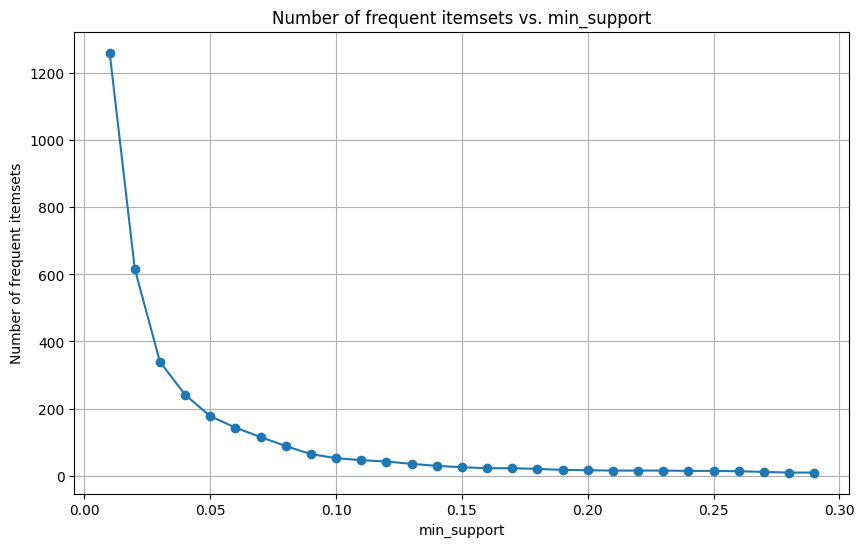

In [1205]:
# Genera una lista di min_sup da testare
min_sups = [round(x, 2) for x in list(np.arange(0.01, 0.3, 0.01))]

# Lista per salvare il numero di itemset per ciascun supporto
num_itemsets = []

# Calcolo degli itemset frequenti per ogni min_sup
for min_sup in min_sups:
    frequent_itemsets = apriori(df_apriori, min_support=min_sup, use_colnames=True)
    num_itemsets.append(len(frequent_itemsets))

# Plot
plt.figure(figsize=(10,6))
plt.plot(min_sups, num_itemsets, marker='o')
plt.title('Number of frequent itemsets vs. min_support')
plt.xlabel('min_support')
plt.ylabel('Number of frequent itemsets')
plt.grid(True)
plt.show()


### Apriori

In [1206]:
min_support = 0.09  # 10% supporto minimo
min_confidence = 0.6  # 60% confidenza minima --> serve dopo nella fase di rules extraction

# Apriori
frequent_itemsets_apriori = apriori(df_apriori, min_support=min_support, use_colnames=True)

# FRA -< Filtra gli itemset con almeno 2 item (lunghezza >= 2)
    #frequent_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) >= 2)]
    #frequent_itemsets_apriori.reset_index(drop=True, inplace=True)

print(frequent_itemsets_apriori.info())
print(frequent_itemsets_apriori.head(51))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   64 non-null     float64
 1   itemsets  64 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None
     support                               itemsets
0   0.184403                            (1955-1979)
1   0.271433                            (1980-1999)
2   0.251206                            (2000-2019)
3   0.293283                           (HighRating)
4   0.172945                            (HighVotes)
5   0.268324                            (LowRating)
6   0.342550                           (LowRuntime)
7   0.297319                             (LowVotes)
8   0.277649                         (MediumRating)
9   0.386621                        (MediumRuntime)
10  0.186352                          (MediumVotes)
11  0.147198                       (VeryHighRating)
12  0.232

### maximal itemset

In [1207]:
# Find maximal itemsets (those that are not subsets of any other itemsets)
maximal_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: not any(x < y for y in frequent_itemsets_apriori['itemsets']))]

# Display the results
print(maximal_itemsets_apriori.info())
print(maximal_itemsets_apriori.head(15))

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 63
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   33 non-null     float64
 1   itemsets  33 non-null     object 
dtypes: float64(1), object(1)
memory usage: 792.0+ bytes
None
     support                            itemsets
0   0.184403                         (1955-1979)
11  0.147198                    (VeryHighRating)
14  0.149610                      (is_from_Asia)
18  0.195491                         (post-2020)
21  0.096818             (LowRuntime, 1980-1999)
22  0.113704          (MediumRuntime, 1980-1999)
23  0.129477   (1980-1999, is_from_NorthAmerica)
24  0.094869              (tvEpisode, 1980-1999)
25  0.125905   (2000-2019, is_from_NorthAmerica)
27  0.148914  (HighRating, is_from_NorthAmerica)
29  0.098812   (is_from_NorthAmerica, HighVotes)
31  0.094034         (is_from_Europe, LowRating)
32  0.118528   (LowRating, is_from_NorthAmerica)

### Association Rules

In [1208]:
#Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)
rules_apriori.info()
rules_apriori.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         18 non-null     object 
 1   consequents         18 non-null     object 
 2   antecedent support  18 non-null     float64
 3   consequent support  18 non-null     float64
 4   support             18 non-null     float64
 5   confidence          18 non-null     float64
 6   lift                18 non-null     float64
 7   representativity    18 non-null     float64
 8   leverage            18 non-null     float64
 9   conviction          18 non-null     float64
 10  zhangs_metric       18 non-null     float64
 11  jaccard             18 non-null     float64
 12  certainty           18 non-null     float64
 13  kulczynski          18 non-null     float64
dtypes: float64(12), object(2)
memory usage: 2.1+ KB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(tvEpisode),(LowRuntime),0.292123,0.342550,0.200176,0.685247,2.000431,1.0,0.100110,2.088781,0.706489,0.460709,0.521252,0.634809
1,(MediumRuntime),(movie),0.386621,0.343849,0.298432,0.771898,2.244878,1.0,0.165493,2.876573,0.904076,0.690755,0.652364,0.819908
2,(movie),(MediumRuntime),0.343849,0.386621,0.298432,0.867917,2.244878,1.0,0.165493,4.643888,0.845143,0.690755,0.784663,0.819908
3,(short),(VeryLowRuntime),0.150306,0.232000,0.136389,0.907407,3.911233,1.0,0.101518,8.294396,0.875993,0.554612,0.879437,0.747645
4,(tvEpisode),(is_from_NorthAmerica),0.292123,0.475923,0.177027,0.606003,1.273321,1.0,0.037999,1.330154,0.303233,0.299529,0.248207,0.488984
5,"(HighRating, LowRuntime)",(tvEpisode),0.138523,0.292123,0.094498,0.682184,2.335263,1.0,0.054032,2.227314,0.663724,0.281121,0.551029,0.502835
6,"(HighRating, tvEpisode)",(LowRuntime),0.137734,0.342550,0.094498,0.686090,2.002891,1.0,0.047317,2.094389,0.580705,0.244949,0.522534,0.480978
7,"(MediumRuntime, LowRating)",(movie),0.158053,0.343849,0.132585,0.838861,2.439624,1.0,0.078238,4.071963,0.700877,0.359000,0.754418,0.612226
8,"(movie, LowRating)",(MediumRuntime),0.145389,0.386621,0.132585,0.911934,2.358728,1.0,0.076375,6.964964,0.674041,0.331940,0.856424,0.627433
9,"(tvEpisode, LowRuntime)",(is_from_NorthAmerica),0.200176,0.475923,0.126322,0.631054,1.325959,1.0,0.031054,1.420472,0.307354,0.229770,0.296009,0.448240


### Scelta valori confidence

In [1209]:
from mlxtend.frequent_patterns import association_rules

conf_values = [0.4, 0.5, 0.6, 0.7]
for c in conf_values:
    rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=c)
    print(f"min_confidence={c}: {len(rules)} regole trovate, lift medio = {rules['lift'].mean():.2f}")


min_confidence=0.4: 45 regole trovate, lift medio = 1.76
min_confidence=0.5: 28 regole trovate, lift medio = 1.99
min_confidence=0.6: 18 regole trovate, lift medio = 2.22
min_confidence=0.7: 11 regole trovate, lift medio = 2.43


In [1210]:
rules_apriori.sort_values(by="lift", axis=0, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(short),(VeryLowRuntime),0.150306,0.232000,0.136389,0.907407,3.911233,1.0,0.101518,8.294396,0.875993,0.554612,0.879437,0.747645
7,"(MediumRuntime, LowRating)",(movie),0.158053,0.343849,0.132585,0.838861,2.439624,1.0,0.078238,4.071963,0.700877,0.359000,0.754418,0.612226
15,"(movie, is_from_Europe)",(MediumRuntime),0.114678,0.386621,0.104797,0.913835,2.363646,1.0,0.060460,7.118653,0.651655,0.264303,0.859524,0.592447
8,"(movie, LowRating)",(MediumRuntime),0.145389,0.386621,0.132585,0.911934,2.358728,1.0,0.076375,6.964964,0.674041,0.331940,0.856424,0.627433
5,"(HighRating, LowRuntime)",(tvEpisode),0.138523,0.292123,0.094498,0.682184,2.335263,1.0,0.054032,2.227314,0.663724,0.281121,0.551029,0.502835
12,"(MediumRating, MediumRuntime)",(movie),0.121034,0.343849,0.096075,0.793791,2.308547,1.0,0.054458,3.181969,0.644879,0.260503,0.685729,0.536601
11,"(LowRuntime, is_from_NorthAmerica)",(tvEpisode),0.189367,0.292123,0.126322,0.667075,2.283543,1.0,0.071004,2.126236,0.693389,0.355669,0.529685,0.549752
14,"(MediumRuntime, is_from_Europe)",(movie),0.134997,0.343849,0.104797,0.776289,2.257647,1.0,0.058378,2.933027,0.643999,0.280169,0.659055,0.540532
13,"(MediumRating, movie)",(MediumRuntime),0.110410,0.386621,0.096075,0.870168,2.250701,1.0,0.053388,4.724409,0.624663,0.239616,0.788333,0.559334
2,(movie),(MediumRuntime),0.343849,0.386621,0.298432,0.867917,2.244878,1.0,0.165493,4.643888,0.845143,0.690755,0.784663,0.819908


### Target Prediction: various attempts (find the most informative one)

In [1212]:
# Filtro le regole con "nord america" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'is_from_NorthAmerica'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

               antecedents             consequents  antecedent support  \
9  (tvEpisode, LowRuntime)  (is_from_NorthAmerica)            0.200176   
4              (tvEpisode)  (is_from_NorthAmerica)            0.292123   

   consequent support   support  confidence      lift  representativity  \
9            0.475923  0.126322    0.631054  1.325959               1.0   
4            0.475923  0.177027    0.606003  1.273321               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
9  0.031054    1.420472       0.307354  0.229770   0.296009    0.448240  
4  0.037999    1.330154       0.303233  0.299529   0.248207    0.488984  


In [1218]:
# Filter the rule where the consequent contains "HighRated"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'is_from_NorthAmerica' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'is_from_NorthAmerica' in the consequents.")


To predict: is_from_NorthAmerica
How? tvEpisode


In [1215]:
# Filtro le regole con "nord america" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'movie'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                              antecedents consequents  antecedent support  \
7              (MediumRuntime, LowRating)     (movie)            0.158053   
12          (MediumRating, MediumRuntime)     (movie)            0.121034   
14        (MediumRuntime, is_from_Europe)     (movie)            0.134997   
1                         (MediumRuntime)     (movie)            0.386621   
16  (MediumRuntime, is_from_NorthAmerica)     (movie)            0.152255   

    consequent support   support  confidence      lift  representativity  \
7             0.343849  0.132585    0.838861  2.439624               1.0   
12            0.343849  0.096075    0.793791  2.308547               1.0   
14            0.343849  0.104797    0.776289  2.257647               1.0   
1             0.343849  0.298432    0.771898  2.244878               1.0   
16            0.343849  0.106096    0.696831  2.026564               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
7   0

In [1217]:
# Filter the rule where the consequent contains "HighRated"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'movie' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'movie' in the consequents.")


To predict: movie
How? MediumRuntime


In [1219]:
# Filtro le regole con "nord america" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'LowRuntime'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                          antecedents   consequents  antecedent support  \
10  (tvEpisode, is_from_NorthAmerica)  (LowRuntime)            0.177027   
6             (HighRating, tvEpisode)  (LowRuntime)            0.137734   
0                         (tvEpisode)  (LowRuntime)            0.292123   

    consequent support   support  confidence      lift  representativity  \
10             0.34255  0.126322    0.713574  2.083127               1.0   
6              0.34255  0.094498    0.686090  2.002891               1.0   
0              0.34255  0.200176    0.685247  2.000431               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
10  0.065682    2.295362       0.631798  0.321222   0.564339    0.541172  
6   0.047317    2.094389       0.580705  0.244949   0.522534    0.480978  
0   0.100110    2.088781       0.706489  0.460709   0.521252    0.634809  


In [1220]:
# Filter the rule where the consequent contains "HighRated"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'LowRuntime' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'LowRuntime' in the consequents.")


To predict: LowRuntime
How? tvEpisode
